# Laboratorio 9 Gale-Shapley and Irving Algorithms
Juan Sebastian Montoya Combita


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
from collections import Counter
from copy import copy



1.   Encuentre el mejor y el peor de los casos para el algoritmo de Gale-Shapley e Irving (Un algoritmo estable para el problema de  "Matrimonio estable") y ejecute en Colab estos algoritmos para los casos n=4 y n=40.




In [2]:
def matching(man_list, women_list, women_df, man_df, women_avialable): #función encargada del emparejamiento
  # Lista de hombres disponibles para hacer pareja
  waiting_list = []
  # Diccionario que almacena las parejas creadas
  proposals = {}
  # variable que lleva el conteo de iteraciones
  count = 0
  while len(waiting_list) < len(man_list):
    #El for hace la escogencia de pareja según las preferencias del hombre
    for man in man_list:
        if man not in waiting_list:
            # Cada hombre escoge a la mujer que tenga de primera preferencia
            women = women_available[man] #pone la lista de mujeres disponibles para el hombre seleccionado
            best_choice = man_df.loc[man][ man_df.loc[man].index.isin(women) ].idxmin() #escoge la mejor mujer para el hombre
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice]) #crea una tupla donde almacena al hombre con su mujer deseada
    # Si una mujer tiene más de un pretendiente, ella escogera su mejor elección
    overlays = Counter([key[1] for key in proposals.keys()]) #crea un diccionario donde tendrá la información de los pretendientes para cada mujer
    # For en donde cada mujer escogera a su mejor elección
    for women in overlays.keys():
        if overlays[women]>1:
            # Parejas que se rompen según la prioridad de escogencia
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # Si un hombre es rechazado por una mujer,no tiene sentido que el hombre mantenga el ofrecimiento a al misma mujer
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]] #elimina la propuesta rechazada
                _women = copy(women_available[p_to_drop[0][0]]) #Escoge el hombre rechazado
                _women.remove(p_to_drop[0][1]) # elimina de la tupla la pareja para ese hombre (que viene siendo la mujer que lo rechazó)
                women_available[p_to_drop[0][0]] = _women #agrega la lista de mujeres disponibles actualizada (quita la mujer que lo rechazó)
    # Los hombres que han obtenido su pareja exitosamente serán agregados a la lista de espera
    waiting_list = [man[0] for man in proposals.keys()] # Lista en donde dice cuales hombres ya tienen pareja
    # Actualiza el contador
    count+=1 #contador de la iteración
    #if (count==10):
     # print(man_df,'\n')
      #print(women_df,'\n')
  return (proposals, count)

# 1 


*   El mejor de los casos será que tanto el hombre como la mujer tengas iguales preferencias, de esta manera el hombre deseará a su primera opción y la primera opción de la mujer será ese hombre también. Obteniendo que cada pareja estara formada con su mejor opción teniendo un matrimonio estable y feliz :D.  
En el algoritmo para este caso se tendrá una sola iteración



In [3]:
def bestcase(women_list, man_list, n): #esta función generará más facilmente el dataframe
  women_df1={}
  if (n==4):
    lista=[1,2,3,4] #como generar el dataframe implica mover los elementos una posicion a la deecha 1-2-3-4 -> 4-1-2-3 -> 3-4-1-2 se inicia cn la posición incial
    for i in women_list:
      women_df1[i]=lista.copy() #esto permite que se guarde la lista, de lo contrario generará un error y aparecerá siempre la lista inicial
      pop=lista[-1] #extrae el último elemento de la lista y lo guarda en una variable auxiliar
      lista.remove(pop) #elimina el último elemento de la lista
      lista.insert(0, pop) #añade en la primera posición el elemento eliminado de la lista, haciendo el desplazamiento deseado
  elif (n==40):
    lista=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
    for j in women_list:
      women_df1[j]=lista.copy()
      pop=lista[-1]
      lista.remove(pop)
      lista.insert(0, pop)
  else:
    print("valor incorrecto")
    return 
  women_df=pd.DataFrame(women_df1)
  women_df.index = man_list
  return (women_df)





*   Para $n=4$





In [4]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df=pd.DataFrame(bestcase(women_list, man_list, 4))
man_df= women_df
women_available = {man:women_list for man in man_list} 

In [5]:
man_df #lista de preferencia de los hombres

,A,B,C,D
a,1,4,3,2
b,2,1,4,3
c,3,2,1,4
d,4,3,2,1


In [6]:
women_df #lista de preferencia de las mujeres

,A,B,C,D
a,1,4,3,2
b,2,1,4,3
c,3,2,1,4
d,4,3,2,1


In [7]:
proporsals, count = matching(man_list, women_list, women_df, man_df, women_available)
proporsals

{('a', 'A'): (1, 1),
 ('b', 'B'): (1, 1),
 ('c', 'C'): (1, 1),
 ('d', 'D'): (1, 1)}

In [8]:
count

1



*   Para $n=40$



In [9]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y' ,'z', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1' , 'h1', 'i1', 'j1', 'k1', 'l1', 'm1']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1']
women_df = bestcase(women_list, man_list, 40)
man_df = women_df
women_available = {man:women_list for man in man_list} 

In [10]:
man_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1
a,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2
b,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3
c,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4
d,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5
e,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
f,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7
g,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8
h,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9
i,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10
j,10,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11


In [11]:
women_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1
a,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2
b,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3
c,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4
d,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5
e,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
f,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7
g,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8
h,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9
i,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10
j,10,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11


In [12]:
proporsals, count = matching(man_list, women_list, women_df, man_df, women_available)
proporsals

{('a', 'A'): (1, 1),
 ('a1', 'A1'): (1, 1),
 ('b', 'B'): (1, 1),
 ('b1', 'B1'): (1, 1),
 ('c', 'C'): (1, 1),
 ('c1', 'C1'): (1, 1),
 ('d', 'D'): (1, 1),
 ('d1', 'D1'): (1, 1),
 ('e', 'E'): (1, 1),
 ('e1', 'E1'): (1, 1),
 ('f', 'F'): (1, 1),
 ('f1', 'F1'): (1, 1),
 ('g', 'G'): (1, 1),
 ('g1', 'G1'): (1, 1),
 ('h', 'H'): (1, 1),
 ('h1', 'H1'): (1, 1),
 ('i', 'I'): (1, 1),
 ('i1', 'I1'): (1, 1),
 ('j', 'J'): (1, 1),
 ('j1', 'J1'): (1, 1),
 ('k', 'K'): (1, 1),
 ('k1', 'K1'): (1, 1),
 ('l', 'L'): (1, 1),
 ('l1', 'L1'): (1, 1),
 ('m', 'M'): (1, 1),
 ('m1', 'M1'): (1, 1),
 ('n', 'N'): (1, 1),
 ('o', 'O'): (1, 1),
 ('p', 'P'): (1, 1),
 ('q', 'Q'): (1, 1),
 ('r', 'R'): (1, 1),
 ('s', 'S'): (1, 1),
 ('t', 'T'): (1, 1),
 ('u', 'U'): (1, 1),
 ('v', 'V'): (1, 1),
 ('w', 'W'): (1, 1),
 ('x', 'X'): (1, 1),
 ('y', 'Y'): (1, 1),
 ('z', 'Z'): (1, 1),
 ('ñ', 'Ñ'): (1, 1)}

In [13]:
count

1



*   Para el peor de los casos se tendrá que se cumple la siguiente formula:  
$\text{iteraciones} = n^2-2n+2$ para el caso $n=4$  
$\text{iteraciones} = 4^2 -2(4)+2 =10$  
Para el caso de $n=40$
$\text{iteraciones} = 40^2 -2(40)+2 =1522$  
Aplicando el algoritmo de montecarlo se tendrán varias configuraciones para $n=4$, se mostrará una como ejemplo:






In [14]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': [4,4,4,1], 'B': [1,3,2,4], 'C':[3,1,1,2], 'D':[2,2,3,3]})
man_df = pd.DataFrame({'A': [2,2,1,3], 'B': [3,1,2,1], 'C':[1,3,3,2], 'D':[4,4,4,4]})
women_df.index = man_list
man_df.index = man_list
women_available = {man:women_list for man in man_list} 
#print(man_df, '\n',women_df)

In [15]:
man_df

,A,B,C,D
a,2,3,1,4
b,2,1,3,4
c,1,2,3,4
d,3,1,2,4


In [16]:
women_df

,A,B,C,D
a,4,1,3,2
b,4,3,1,2
c,4,2,1,3
d,1,4,2,3


In [17]:
proporsals, count = matching(man_list, women_list, women_df, man_df, women_available)
proporsals

{('a', 'B'): (3, 1),
 ('b', 'C'): (3, 1),
 ('c', 'D'): (4, 3),
 ('d', 'A'): (3, 1)}

In [18]:
count

10

2.   Ejecute el algoritmo de Gale-Shapley 100 veces usando permutaciones aleatorias como listas de preferncia para n=4 y 40. Encuentre el mínimo, máximo y promedio del número de iteraciones y haga una gráfica de la distribución



In [19]:
def rlist(r): #esta función simplifica la generación de listas aleatorias
  if r==4:
    return random.sample(range(1, 5), 4)
  elif r==40:
    return random.sample(range(1,41),40)
  else:
    return "Error, valor inválido, debe ser 4 o 40"

In [20]:
def df_gen_generdf(n): #genera el dataframe para los casos n=4 o 40  
  if n==4:
    man_list = ['a', 'b', 'c', 'd']
    women_list = ['A', 'B', 'C', 'D']
    women_df = pd.DataFrame({'a': rlist(4), 'b': rlist(4), 'c': rlist(4), 'd': rlist(4)})
    man_df = pd.DataFrame({'a': rlist(4), 'b': rlist(4), 'c': rlist(4), 'd': rlist(4)})
  elif n==40:
    man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y' ,'z', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1' , 'h1', 'i1', 'j1', 'k1', 'l1', 'm1']
    women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1']
    women_df = pd.DataFrame({'a': rlist(40), 'b': rlist(40), 'c': rlist(40), 'd': rlist(40), 'e': rlist(40), 'f' : rlist(40), 'g' : rlist(40), 'h' : rlist(40), 'i': rlist(40), 'j' : rlist(40), 'k' : rlist(40), 'l' : rlist(40), 'm' : rlist(40), 'n' : rlist(40), 'ñ' : rlist(40), 'o': rlist(40), 'p' : rlist(40), 'q' : rlist(40), 'r': rlist(40), 's' : rlist(40), 't' : rlist(40), 'u': rlist(40), 'v': rlist(40), 'w': rlist(40), 'x': rlist(40), 'y': rlist(40) ,'z': rlist(40), 'a1': rlist(40), 'b1': rlist(40), 'c1': rlist(40), 'd1': rlist(40), 'e1': rlist(40), 'f1': rlist(40), 'g1': rlist(40) , 'h1': rlist(40), 'i1': rlist(40), 'j1': rlist(40), 'k1': rlist(40), 'l1': rlist(40), 'm1': rlist(40)})
    man_df = pd.DataFrame({'a': rlist(40), 'b': rlist(40), 'c': rlist(40), 'd': rlist(40), 'e': rlist(40), 'f' : rlist(40), 'g' : rlist(40), 'h' : rlist(40), 'i': rlist(40), 'j' : rlist(40), 'k' : rlist(40), 'l' : rlist(40), 'm' : rlist(40), 'n' : rlist(40), 'ñ' : rlist(40), 'o': rlist(40), 'p' : rlist(40), 'q' : rlist(40), 'r': rlist(40), 's' : rlist(40), 't' : rlist(40), 'u': rlist(40), 'v': rlist(40), 'w': rlist(40), 'x': rlist(40), 'y': rlist(40) ,'z': rlist(40), 'a1': rlist(40), 'b1': rlist(40), 'c1': rlist(40), 'd1': rlist(40), 'e1': rlist(40), 'f1': rlist(40), 'g1': rlist(40) , 'h1': rlist(40), 'i1': rlist(40), 'j1': rlist(40), 'k1': rlist(40), 'l1': rlist(40), 'm1': rlist(40)})
  else:
    return ('Error, el valor n debe ser 4 o 40')
  women_df.index = women_list
  women_df= women_df.T
  man_df.index = women_list
  man_df = man_df.T
  #Diccionario de control para saber cuales mujeres están disponibles en las propuestas de cada hombre
  women_available = {man:women_list for man in man_list} 
  return (man_list, women_list, women_df, man_df, women_available)

In [21]:
def graficar_hist(datos, binss,color): #función para hacer un histograma, trae como atributos los datos a graficar y el color que tendrá el gráfico
  plt.hist(datos, bins=binss, facecolor=color) #bins se refiere a la distribución de las barras en el histograma, para dejarlo en modo automático de pone 'auto' aunque el valor más aproximado fue 15
  plt.show()

In [22]:
def graficar_pie(iteraciones, num_intentos):
  indices, valores = np.unique(iteraciones, return_counts=True) #guarda los índices y valores del arreglo al ordenarlo por tipo de dato y su frecuencia
  plt.pie(valores, autopct='%1.2f', startangle=90) #autopct hace que se muestre el dato porcentual en la gráfica
  plt.legend(indices, loc='best') #muestra la leyenda en el lugar adecuado
  plt.axis('equal') #posiciona la leyenda en un lugar adecuado
  plt.show() 
  for i in range(len(indices)):
    print('La probabilidad de hacer el emparejamiento en %d repeticiones es del: %4.2f porciento'%(indices[i],(valores[i]/num_intentos)*100)) #muestra la probabilidad de cada número de cartas

In [23]:
def print_info(iteraciones):
  print('El valor máximo de repeticiones fue de: ', iteraciones.max())
  print('El valor mínimo de repeticiones fue de : ', iteraciones.min())
  print('El número promedio de repeticiones fue de: ',round(iteraciones.mean()))

# 2
Para $n=4$

In [24]:
iterations= np.array([])
r=100
for k in range (0,r,1):
  man_list, women_list, women_df, man_df, women_available = df_gen_generdf(4) #genera los datos de preferencias para los hombres y mujeres con distribución aleatoria
  proposals, count = matching(man_list, women_list, women_df, man_df, women_available)
  if (count==10):
    print(proposals)
  iterations=np.append(iterations, [count])

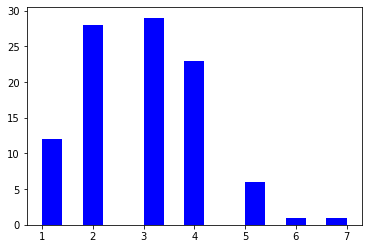

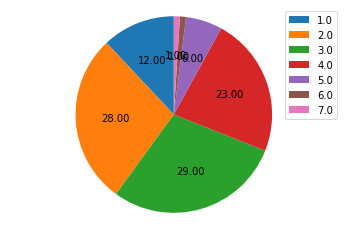

La probabilidad de hacer el emparejamiento en 1 repeticiones es del: 12.00 porciento
La probabilidad de hacer el emparejamiento en 2 repeticiones es del: 28.00 porciento
La probabilidad de hacer el emparejamiento en 3 repeticiones es del: 29.00 porciento
La probabilidad de hacer el emparejamiento en 4 repeticiones es del: 23.00 porciento
La probabilidad de hacer el emparejamiento en 5 repeticiones es del: 6.00 porciento
La probabilidad de hacer el emparejamiento en 6 repeticiones es del: 1.00 porciento
La probabilidad de hacer el emparejamiento en 7 repeticiones es del: 1.00 porciento
El valor máximo de repeticiones fue de:  7.0
El valor mínimo de repeticiones fue de :  1.0
El número promedio de repeticiones fue de:  3.0


In [25]:
graficar_hist(iterations, 15 ,'blue')
graficar_pie(iterations, r)
print_info(iterations)

Para $n=40$

In [26]:
iterations= np.array([])
r=100
for k in range (0,r,1):
  man_list, women_list, women_df, man_df, women_available = df_gen_generdf(40) #genera los datos de preferencias para los hombres y mujeres con distribución aleatoria
  proposals, count = matching(man_list, women_list, women_df, man_df, women_available)
  iterations=np.append(iterations, [count])

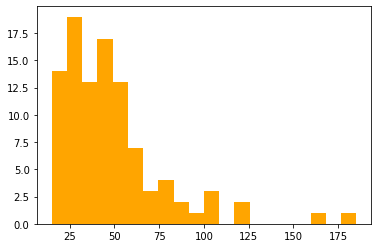

El valor máximo de repeticiones fue de:  185.0
El valor mínimo de repeticiones fue de :  15.0
El número promedio de repeticiones fue de:  48.0


In [27]:
graficar_hist(iterations,20, 'orange')
print_info(iterations)